(800, 800, 3) (800, 800, 3)


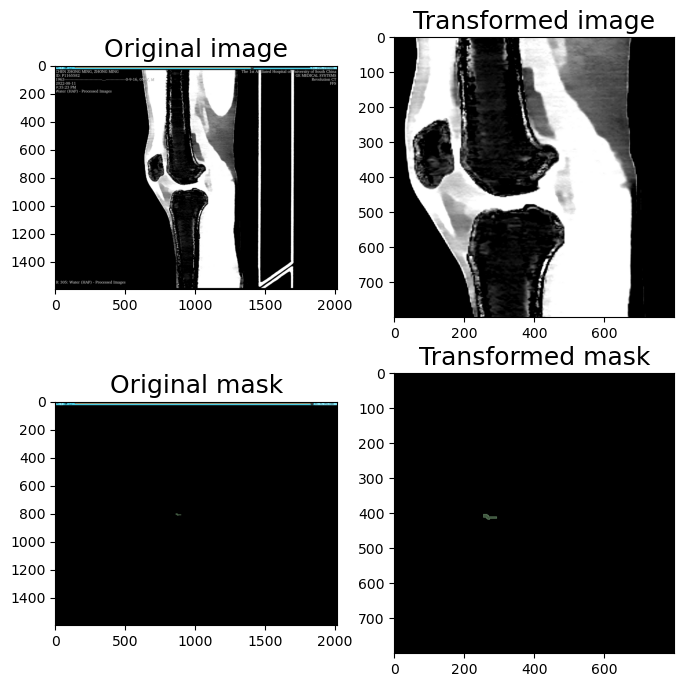

In [23]:
import cv2
from matplotlib import pyplot as plt

import albumentations as A

trans_height=800
trans_width=800
def visualize(image, mask, original_image=None, original_mask=None):
    fontsize = 18

    if original_image is None and original_mask is None:
        f, ax = plt.subplots(2, 1, figsize=(8, 8))

        ax[0].imshow(image)
        ax[1].imshow(mask)
    else:
        f, ax = plt.subplots(2, 2, figsize=(8, 8))

        ax[0, 0].imshow(original_image)
        ax[0, 0].set_title('Original image', fontsize=fontsize)

        ax[1, 0].imshow(original_mask)
        ax[1, 0].set_title('Original mask', fontsize=fontsize)

        ax[0, 1].imshow(image)
        ax[0, 1].set_title('Transformed image', fontsize=fontsize)

        ax[1, 1].imshow(mask)
        ax[1, 1].set_title('Transformed mask', fontsize=fontsize)
image = cv2.imread('D:\download\R1-1Scene.png')
mask =  cv2.imread('D:\download\R1-2Scene.png')
aug1 =  A.HorizontalFlip(p=1)#水平翻转100%翻转，p为概率
aug2 =  A.VerticalFlip(p=1)#垂直翻转100%翻转，p为概率
aug3=  A.RandomRotate90(p=1)#随机旋转0、90、180、270度，P为概率
aug4 = A.Transpose(p=1)#x,y轴互换，p为概率
aug5 = A.CenterCrop(p=1, height=trans_height, width=trans_width)#中心裁剪,p为概率
augmented = aug5(image=image, mask=mask)

image_h_flipped = augmented['image']#得到图像
mask_h_flipped = augmented['mask']#得到相应的标签
print(image_h_flipped.shape,mask_h_flipped.shape)
visualize(image_h_flipped, mask_h_flipped, original_image=image, original_mask=mask)

In [24]:
import cv2

# 读取原始图像
image = cv2.imread('D:\download\R1-1Scene.png')

# 水平翻转
flipped_horizontally = cv2.flip(image, 1)

# 垂直翻转
flipped_vertically = cv2.flip(image, 0)

# 旋转90度
rotated_90_degree = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)

# 旋转180度
rotated_180_degree = cv2.rotate(image, cv2.ROTATE_180)

# 旋转270度
rotated_270_degree = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)

# 显示并保存增强后的图像
cv2.imshow('Horizontal Flip', flipped_horizontally)
cv2.imshow('Vertical Flip', flipped_vertically)
cv2.imshow('Rotated 90 Degrees', rotated_90_degree)
cv2.imshow('Rotated 180 Degrees', rotated_180_degree)
cv2.imshow('Rotated 270 Degrees', rotated_270_degree)
cv2.waitKey(0)

cv2.imwrite('horizontal_flip.jpg', flipped_horizontally)
cv2.imwrite('vertical_flip.jpg', flipped_vertically)
cv2.imwrite('rotated_90.jpg', rotated_90_degree)
cv2.imwrite('rotated_180.jpg', rotated_180_degree)
cv2.imwrite('rotated_270.jpg', rotated_270_degree)

# 关闭窗口
cv2.destroyAllWindows()


error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1272: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'
